In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [200]:
x = 460000
np.sqrt(8/x*math.log(4*(2*x)**10/.05, math.e))

0.04964277890917069

In [57]:
def vc_bound(N,delta,dvc):
    return np.sqrt(8/N*math.log(4*(2*N)**dvc/delta, math.e))

In [58]:
def rademacher_bound(N,delta,dvc):
    growth = (N)**dvc
    a = np.sqrt(2*math.log(2*N*growth, math.e)/N)
    b = np.sqrt(2/N*math.log(1/delta, math.e)+1/N)
    return a+b

In [59]:
def parrondo_ln(N,delta,dvc):
    growth = (2*N)**dvc
    ln = math.log(6*growth/delta, math.e)/N
    return ln

In [60]:
def quadratic(a,b,c):
    return ((-b + (b ** 2 - 4 * a * c) ** 0.5) / 2 * a)

In [61]:
def parrondo_bound(N,delta,dvc):
    return quadratic(1,2/N,-parrondo_ln(N,delta,dvc))

In [62]:
def devroye_bound(N,delta,dvc):
    return quadratic(1-(4/(2*N)),-4/(2*N),-devroye_ln(N,delta,dvc)/(2*N))

In [63]:
def devroye_ln(N,delta,dvc):
    growth = (N**2)**dvc
    ln = math.log(4*growth*int(1/delta), math.e)
    return ln

In [64]:
N = 5
print("VC %s" % vc_bound(N,.05,50))
print("Parrondo Bound %s" % parrondo_bound(N,.05,50))
print("Rademacher %s" %rademacher_bound(N,.05,50))
print("Devroye %s" %devroye_bound(N,.05,50))

VC 13.828161484991483
Parrondo Bound 4.701361981989992
Rademacher 6.936605262311301
Devroye 2.013525195545761


In [163]:
devroye_bound(10000,.05,50)

(0.21514196719744536, -0.21494200719744538)

In [39]:
a = [x**10*math.e**(-.003125*x) for x in r]

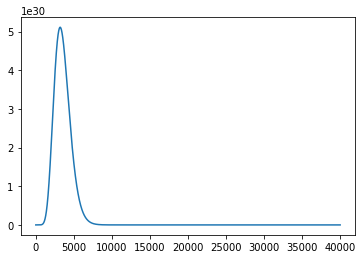

In [40]:
plt.plot(r, a)

In [7]:
round()

<function round(number, ndigits=None)>

In [49]:
abs(np.array(a)-.0122) < .00001

array([False, False, False, ..., False, False, False])

In [36]:
100math.e**-100

0.0

# Problem 4

In [49]:
class Line():
    def line(self,xs,ys):
        self.m = (xs[0]-xs[1])/(ys[0]-ys[1])
class Plot():
    def plot(self):
        plt.plot([-1,1],[self.m*x for x in [-1,1]])
        xvals = np.arange(-1,1,.1);
        amplitude = np.sin(xvals*math.pi)
        plt.plot(xvals, amplitude)
        plt.plot(self.x,self.y,"o")
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.show()
class bandv(Line, Plot):
    def __init__(self,N):
        self.N = N
        self.runEx()
        self.bias()
        self.var()
    def runEx(self):
        avgs = []
        for x in range(100):
            self.x = np.random.uniform(1,-1,2)
            self.y = np.sin(self.x*math.pi)
            self.line(self.x,self.y)
            #self.plot()
            avgs.append(self.m)
        self.gbar = np.mean(avgs)
    def bias(self):
        xvals = np.arange(-1,1,.1);
        f = np.sin(xvals*math.pi)
        gbar = xvals*self.gbar
        bias = np.mean(np.power((gbar-f),2))
        print(bias)
    def var(self):
        variances = []
        for x in range(1000): # this is getting the variance of all the expected datasets from gbar
            self.x = np.random.uniform(1,-1,2)
            self.y = np.sin(self.x*math.pi)
            self.line(self.x,self.y)

            
            xvals = np.arange(-1,1,.1);
            gbar = xvals*self.gbar
            g = xvals*self.m
            variances.append(np.mean(np.power((g-gbar),2)))

        var = np.mean(variances)
        print(var)
            
        

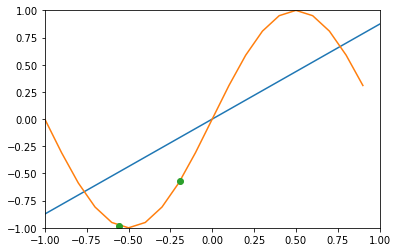

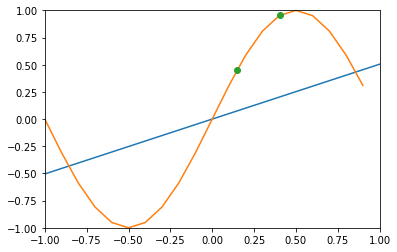

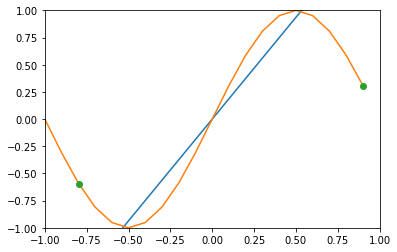

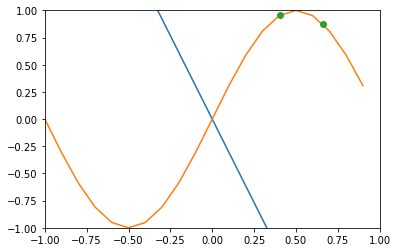

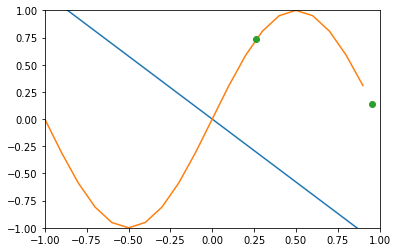

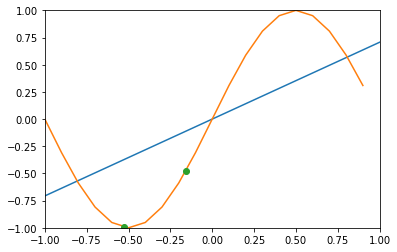

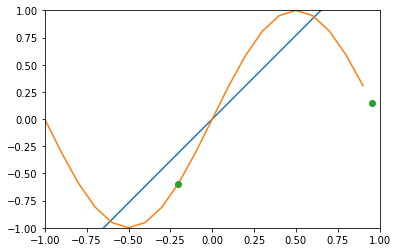

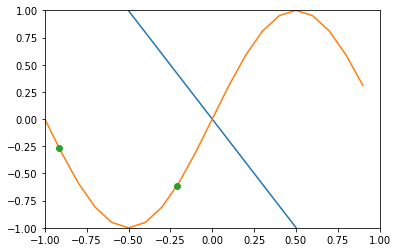

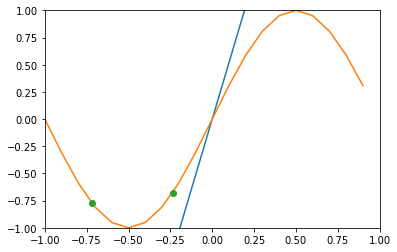

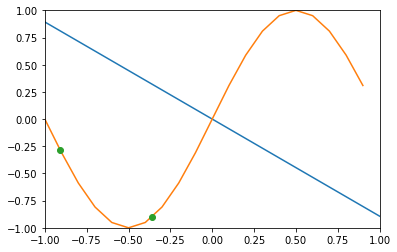

0.31740106322048817
49.55817328860277


In [48]:
bandv(2)

In [50]:
bandv(2)

0.2701831788296171
23.284559815452738


# How to find line for ax

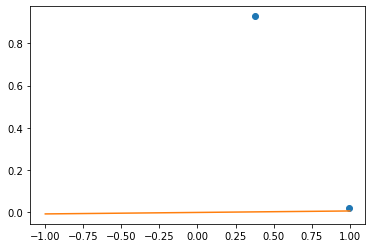

In [54]:
x = np.random.uniform(1,-1,2)
y = np.sin(x*math.pi)
p = [(x[0]+x[1])/2,(y[0]+y[1])/2] #midpoint and then line is less accurate
a = (x[0]-x[1])/(y[0]-y[1]) + p[1]/p[0]
a = a/2
plt.plot(x,y,"o")
plt.plot(np.arange(-1,1.1,0.1), [a * x for x in np.arange(-1,1.1,0.1)])

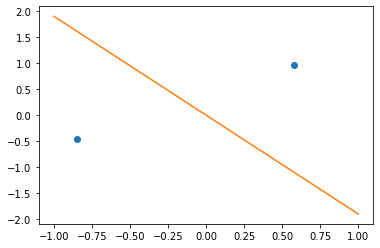

In [43]:
p = [(x[0]+x[1])/2,(y[0]+y[1])/2] #midpoint and then line is less accurate
a = p[1]/p[0]
plt.plot(x,y,"o")
plt.plot(np.arange(-1,1.1,0.1), [a * x for x in np.arange(-1,1.1,0.1)])

# Problem 5

In [289]:
x = np.random.uniform(1,-1,2)
y = np.sin(x*math.pi)

array([ 0.71029031, -0.37547851])

In [157]:
xs = [-.5,.75]
ys = [-.75,.25]

In [158]:
p = [(xs[0]+xs[1])/2,(ys[0]+ys[1])/2]

In [159]:
a = (ys[0]-ys[1])/(xs[0]**2-xs[1]**2)
b = ys[0] - (a*xs[0]**2)

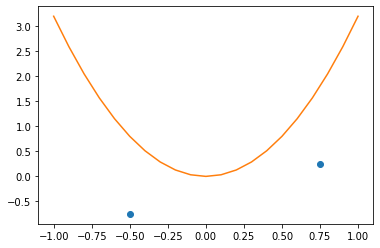

In [160]:
plt.plot(xs,ys,"o")
plt.plot(np.arange(-1,1.1,0.1), [a * x**2 for x in np.arange(-1,1.1,0.1)])

# Problem 7

In [35]:
class Line():
    def ax(self,xs,ys):
        p = [(xs[0]+xs[1])/2,(ys[0]+ys[1])/2]
        m = p[1]/p[0]
        return m
    def ax_sqr(self,xs,ys):
        a = (ys[0]-ys[1])/(xs[0]**2-xs[1]**2)
        return a
    def ax_sqr_b(self,xs,ys):
        a = (ys[0]-ys[1])/(xs[0]**2-xs[1]**2)
        b = ys[0] - (a*xs[0]**2)
        return [a,b]
    def b(self,xs,ys):
        b = (ys[0]+ys[1])/2
        return b
    def ax_b(self,xs,ys):
        m = (ys[0]-ys[1])/(xs[0]-xs[1])
        b = ys[0]-m*xs[0]
        return [m,b]
    
class bandv(Line, Plot):
    def __init__(self,N):
        self.N = N
        self.xvals = np.arange(-1,1,.1);
        self.f = np.sin(self.xvals*math.pi)
        self.runEx()
    def plot(self):
        plt.plot(self.xvals,self.xvals * self.axV, label="ax")
        plt.plot(self.xvals,self.xvals**2 * self.ax_sqrV, label="ax^2")
        plt.plot(self.xvals,self.xvals**2 * self.ax_sqr_bV[0] + self.ax_sqr_bV[1], label="ax^2+b")
        plt.plot(self.xvals,[self.bV for x in self.xvals], label="b")
        plt.plot(self.xvals,self.xvals * self.ax_bV[0] + self.ax_bV[1], label="ax+b")
        plt.plot(self.xvals,np.sin(self.xvals*math.pi),label="sin")
        
        plt.plot(self.x,self.y,"o")
        plt.legend()
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.show()
    def runEx(self):
        eouts = []
        for x in range(10000):
            self.x = np.random.uniform(1,-1,2)
            self.y = np.sin(self.x*math.pi)
            self.axV = self.ax(self.x,self.y)
            self.ax_sqrV = self.ax_sqr(self.x,self.y)
            self.ax_sqr_bV = self.ax_sqr_b(self.x,self.y)
            self.bV = self.b(self.x,self.y)
            self.ax_bV = self.ax_b(self.x,self.y)
            eouts.append([self.Eout_ax(), self.Eout_ax_sqr(), self.Eout_ax_sqr_b(), self.Eout_b(), self.Eout_ax_b()])
        self.eouts = eouts
        self.eout = np.mean(eouts,axis=0) 
        print(self.eout)
    def Eout_ax(self):
        g = self.xvals * self.axV
        return np.mean(np.power((g-self.f),2))
    
    def Eout_ax_sqr(self):
        g = self.xvals**2 * self.ax_sqrV
        return np.mean(np.power((g-self.f),2))
    
    def Eout_ax_sqr_b(self):
        g = self.xvals**2 * self.ax_sqr_bV[0] + self.ax_sqr_bV[1]
        return np.mean(np.power((g-self.f),2))
  
    def Eout_b(self):
        g = self.bV
        return np.mean(np.power((g-self.f),2))
    
    def Eout_ax_b(self):
        g = self.xvals * self.ax_bV[0] + self.ax_bV[1]
        return np.mean(np.power((g-self.f),2))
        
        

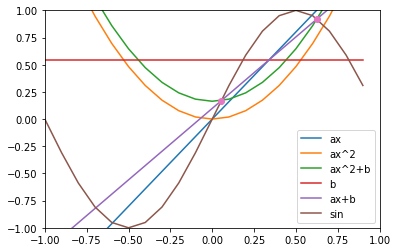

[0.34896551 1.25824452 1.49730722 0.79795222 0.24569787]


In [162]:
obj = bandv(2)


In [36]:
obj = bandv(2)

[9.99429096e-01 3.02634125e+04 2.96246592e+04 7.54420968e-01
 1.92942524e+00]


In [37]:
list(obj.eout)

[0.9994290963810519,
 30263.412526478165,
 29624.659195551496,
 0.7544209679431738,
 1.929425237385074]

In [20]:
obj = bandv(2)

[9.07400211e-01 1.25440685e+05 1.01540545e+05 7.41271081e-01
 1.91099001e+00]


In [24]:
obj.eouts

[[0.20955690957891204,
  2.5743784836301686,
  1.9071415914661116,
  0.5814836775589316,
  0.43322475347809686],
 [0.21298254773943573,
  0.9297799774083643,
  0.9641944697891844,
  0.6653465971699583,
  0.2097990880229726],
 [0.24341546476912831,
  0.6456082626205715,
  1.2952265886578223,
  1.1277402966559116,
  3.4100554403389354],
 [0.31437559299335793,
  0.6639803086139587,
  1.519094090974272,
  1.3721882881004892,
  4.024397652467577],
 [0.29782468087686365,
  0.5032709687018346,
  0.5531368326278456,
  0.5449635685176788,
  0.6636931602948463],
 [0.6056431767056933,
  111.48990035135621,
  52.6864285812411,
  0.500040395086146,
  0.5467258604902944],
 [1.029912712586087,
  7.341025057329899,
  7.746678264788639,
  0.767809246447679,
  0.9095683282591575],
 [0.896071545488933,
  2.2562282894250294,
  3.148214578010589,
  1.0131069373956902,
  0.4323773272937698],
 [0.24275116759368354,
  2.738133397900179,
  2.175936212612266,
  0.6138684679239004,
  0.407532369495223],
 [3.9577

In [25]:
np.power([1,1,1,2],2)

array([1, 1, 1, 4])